# Get The Dataset

In [1]:
!pip install -U kora

     |████████████████████████████████| 51kB 1.6MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 


In [3]:
from kora import kaggle

In [4]:
kaggle.ls('chinnatiptaemkaeo/superai-retail-dataset')

,name,size,creationDate
0,Supermarket Data.csv,129MB,2020-10-18 11:45:44
1,Online Retail.csv,43MB,2020-10-18 11:45:44
2,dash.css,12KB,2020-10-18 11:45:44


In [6]:
kaggle.download('chinnatiptaemkaeo/superai-retail-dataset')

 69% 17.0M/24.6M [00:00<00:00, 70.8MB/s]
100% 24.6M/24.6M [00:00<00:00, 97.5MB/s]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Online Retail.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531283 entries, 0 to 531282
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  530691 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [11]:
# Data preparation
df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


# Monthly Sales

In [12]:
# Preparation
monthly_sales = df.groupby(by='Month').agg({'Amount' : 'sum',
                                            'CustomerID' : 'nunique',
                                            'InvoiceNo' : 'nunique'})
monthly_sales['TicketSize'] = monthly_sales['Amount'] / monthly_sales['InvoiceNo']
monthly_sales.columns = ['Amount', 'TotalCustomer', 'TotalTicket', 'TicketSize']
monthly_sales.reset_index(inplace=True)

monthly_sales.head()

,Month,Amount,TotalCustomer,TotalTicket,TicketSize
0,2010-12-01,823746.140,886,1629,505.675961
1,2011-01-01,691364.560,742,1120,617.289786
2,2011-02-01,523631.890,759,1126,465.037202
3,2011-03-01,717639.360,975,1531,468.738968
4,2011-04-01,537808.621,857,1318,408.049030


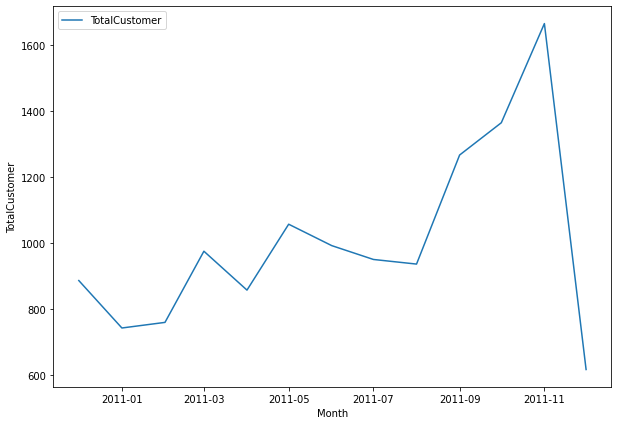

In [35]:
# Plot Number of customers
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Month', 
             y = 'TotalCustomer',
             data = monthly_sales, 
             label = 'TotalCustomer');

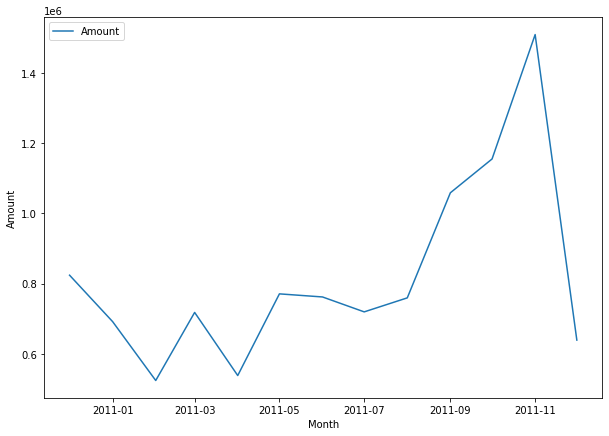

In [36]:
# Monthly sales
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Month',
             y = 'Amount', 
             data = monthly_sales, 
             label = 'Amount');

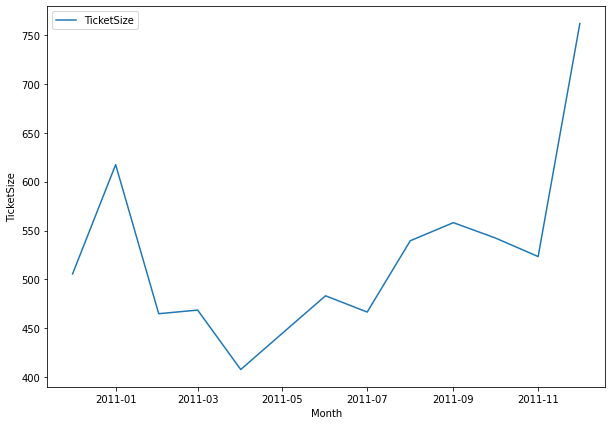

In [37]:
# Ticket size
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Month', 
             y = 'TicketSize', 
             data = monthly_sales, 
             label = 'TicketSize');

# Country Comparison

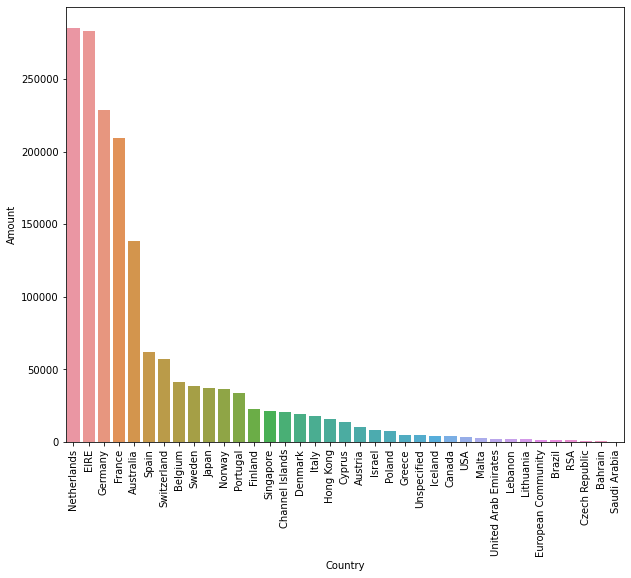

In [47]:
# Country comparison - UK Excluded
country_sales_no_uk = country_sales[country_sales['Country'] != 'United Kingdom']

plt.figure(figsize=(10, 8))
sns.barplot(y = 'Amount',
            x = 'Country', 
            data = country_sales_no_uk)
plt.xticks(rotation=90);

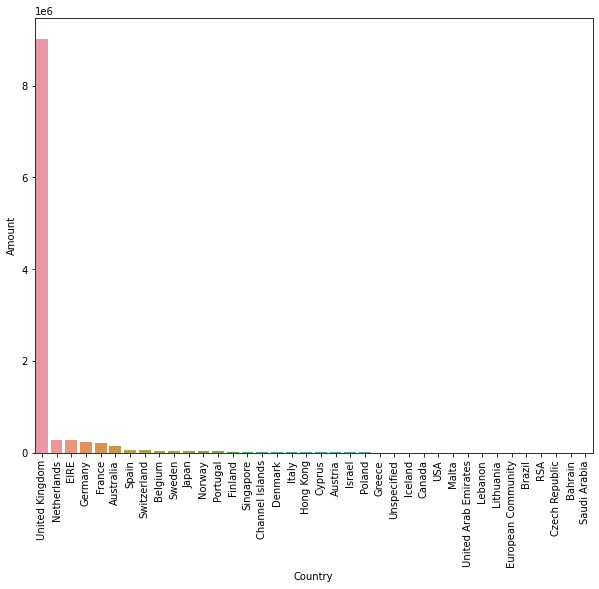

In [45]:
# Country comparison
country_sales = df.groupby(by=['Country'])[['Amount']].sum()\
                                    .reset_index()\
                                    .sort_values(by='Amount', ascending=False)
                                    
plt.figure(figsize=(10,8))
sns.barplot(y = 'Amount', 
            x = 'Country', 
            data = country_sales)
plt.xticks(rotation=90);

# Product Portfolio

In [20]:
product_sales = df.groupby(by=['Description'])[['Amount', 'Quantity']].sum()
product_sales.head()

,Amount,Quantity
Description,,
4 PURPLE FLOCK DINNER CANDLES,290.80,144
50'S CHRISTMAS GIFT BAG LARGE,2343.63,1915
DOLLY GIRL BEAKER,2891.25,2455
I LOVE LONDON MINI BACKPACK,1628.17,389
I LOVE LONDON MINI RUCKSACK,4.15,1


<Figure size 720x360 with 0 Axes>

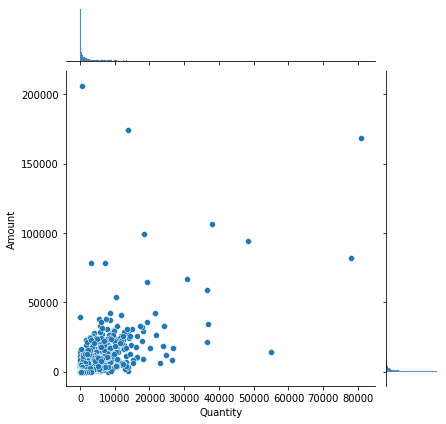

In [21]:
## Product porfolio
plt.figure(figsize=(10, 5))
#sns.scatterplot(x = 'Quantity', y = 'Amount', data = product_sales);
sns.jointplot(x = 'Quantity', y = 'Amount', data = product_sales);

In [22]:
# Top 5 best selling products
product = df[['Description','Amount', 'Quantity']]
top_best = product.nlargest(6, columns = 'Quantity')
top_best

,Description,Amount,Quantity
529802,"PAPER CRAFT , LITTLE BIRDIE",168469.6,80995
60479,MEDIUM CERAMIC TOP STORAGE JAR,77183.6,74215
492030,ASSTD DESIGN 3D PAPER STICKERS,0.0,12540
73123,NaN,0.0,5568
412729,WORLD WAR 2 GLIDERS ASSTD DESIGNS,1008.0,4800
201726,SMALL POPCORN HOLDER,3096.0,4300


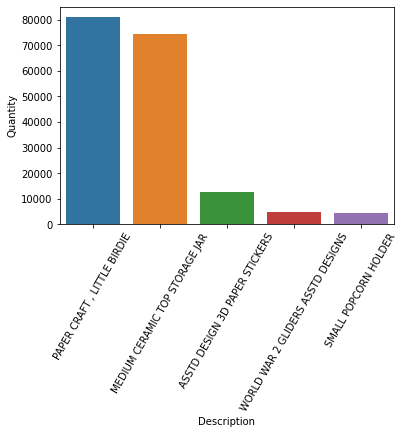

In [51]:
sns.barplot(y = 'Quantity', x = 'Description', data = top_best )
plt.xticks(rotation=60);

In [24]:
# Top 10 Bad Selling Products
top_bad = product.nsmallest(6, columns = 'Quantity')
top_bad

,Description,Amount,Quantity
113,PHOTO CLIP LINE,1.25,1
114,FELT EGG COSY CHICKEN,0.85,1
115,PIGGY BANK RETROSPOT,2.55,1
118,COOK WITH WINE METAL SIGN,1.95,1
120,YELLOW BREAKFAST CUP AND SAUCER,2.95,1
121,PINK BREAKFAST CUP AND SAUCER,2.95,1


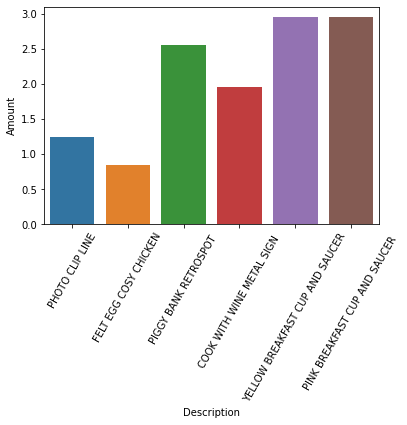

In [52]:
sns.barplot(y = 'Amount', x = 'Description', data = top_bad)
plt.xticks(rotation=60);

In [26]:
## Top 5 products with the highest income
top_products_income = product.nlargest(6, columns = 'Amount')
top_products_income 

,Description,Amount,Quantity
529802,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
60479,MEDIUM CERAMIC TOP STORAGE JAR,77183.60,74215
217959,PICNIC BASKET WICKER 60 PIECES,38970.00,60
14794,AMAZON FEE,13541.33,1
293620,Adjust bad debt,11062.06,1
169617,POSTAGE,8142.75,1


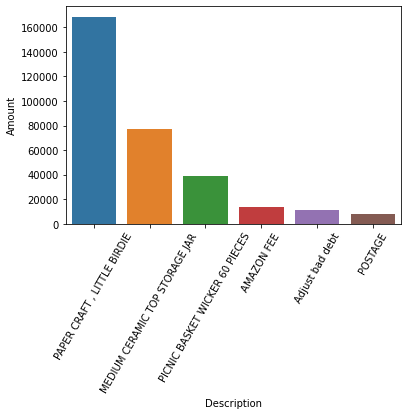

In [53]:
sns.barplot(y = 'Amount', x = 'Description', data = top_products_income );
plt.xticks(rotation=60);

# Dashboard

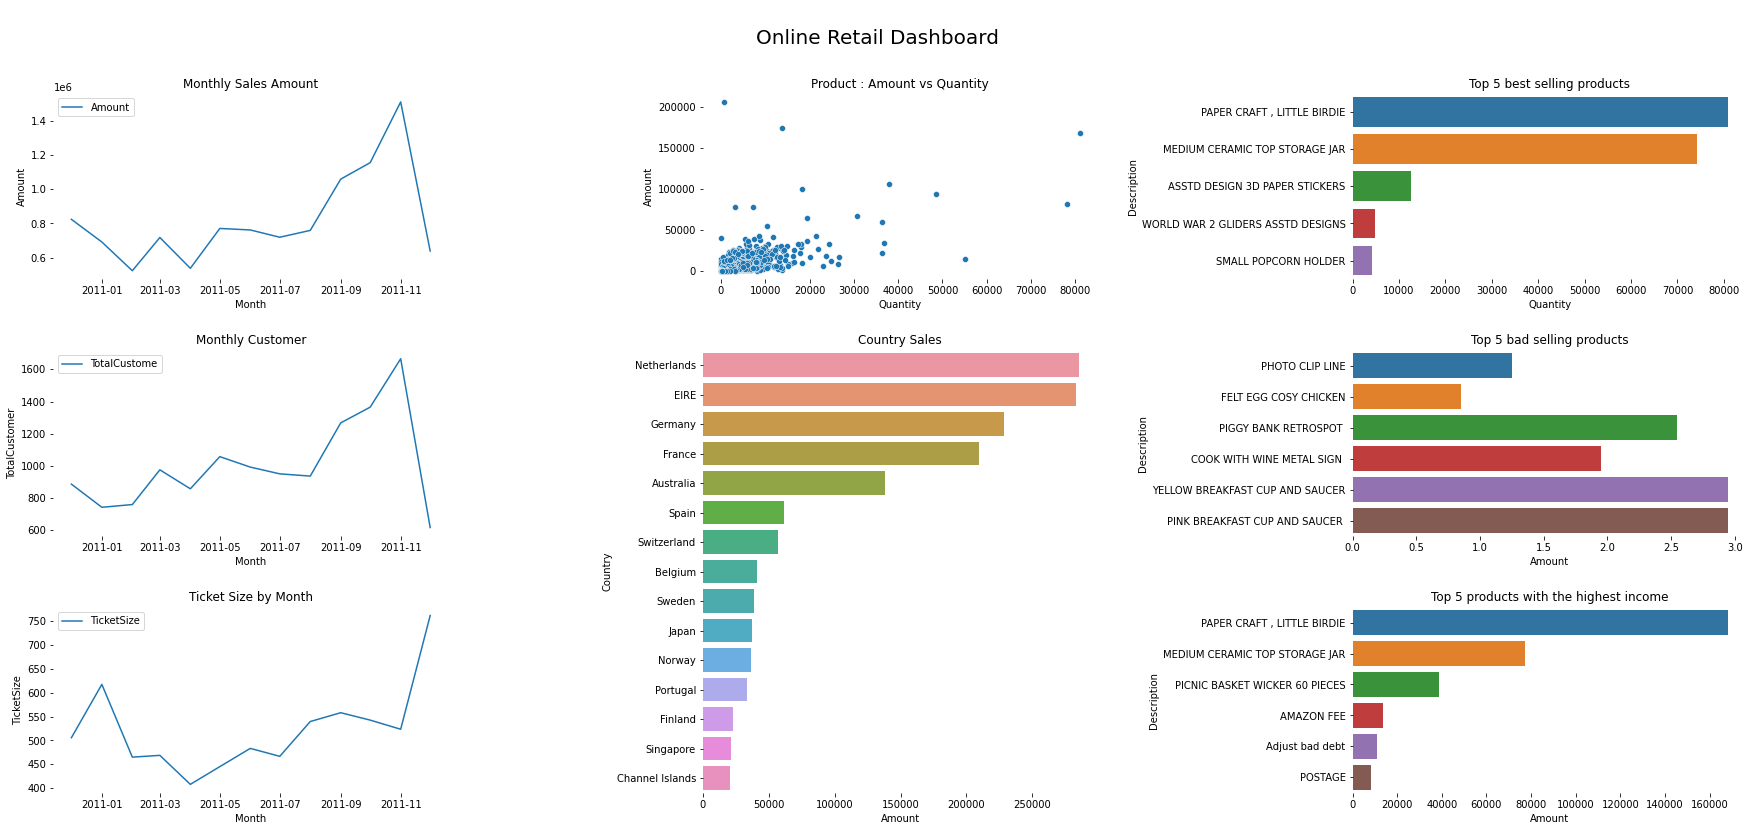

In [58]:
fig, ax = plt.subplots(3, 3, figsize=(25,12))
gs = ax[1, 1].get_gridspec()
for a in ax[1:, -2]:
     a.remove()
axbig = fig.add_subplot(gs[1:, -2])

sns.lineplot(x = 'Month', y = 'Amount', data = monthly_sales, label = 'Amount', ax = ax[0, 0])
sns.lineplot(x = 'Month', y = 'TotalCustomer', data = monthly_sales, label = 'TotalCustome', ax = ax[1, 0])
sns.lineplot(x = 'Month', y = 'TicketSize', data = monthly_sales, label = 'TicketSize', ax = ax[2, 0])
sns.scatterplot(x = 'Quantity', y = 'Amount', data = product_sales,  ax = ax[0, 1])
sns.barplot(y = 'Country', x = 'Amount', data = country_sales_no_uk.head(15),  ax = axbig)
sns.barplot(y = 'Description', x = 'Quantity', data = top_best, ax = ax[0, 2] )
sns.barplot(y = 'Description', x = 'Amount', data = top_bad, ax = ax[1, 2] )
sns.barplot(y = 'Description', x = 'Amount', data = top_products_income, ax = ax[2, 2])

ax[0,0].set_title('Monthly Sales Amount')
ax[1,0].set_title('Monthly Customer')
ax[2,0].set_title('Ticket Size by Month')
ax[0,1].set_title('Product : Amount vs Quantity')
ax[0,2].set_title('Top 5 best selling products')
ax[1,2].set_title('Top 5 bad selling products')
ax[2,2].set_title('Top 5 products with the highest income')
axbig.set_title('Country Sales')

plt.tight_layout(pad=3.0)
fig.suptitle('\nOnline Retail Dashboard', fontsize = 20)
fig.subplots_adjust(top=0.88)
sns.despine(bottom= True, left= True)

plt.show()

# Create dash_app.py file

In [59]:
%%sh
pip install -q dash
pip install -q dash_core_components
pip install -q dash_bootstrap_components
pip install -q dash_html_components
pip install -q dash_table

In [60]:
%%sh
# get ngrok
curl -O https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13.1M  100 13.1M    0     0  29.1M      0 --:--:-- --:--:-- --:--:-- 29.0M
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)


In [61]:
%%writefile dash_app.py

import dash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__)#, external_stylesheets=external_stylesheets

## data preparation
path = "/content/drive/My Drive/Colab Notebooks/Online Retail.csv"
df = pd.read_csv(path)

df['Amount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['CustomerID'] = df['CustomerID'].astype(str)
df['Month'] = df['Date'].apply(lambda x : x.replace(day=1))

monthly_sales = df.groupby(by = 'Month').agg({'Amount' : 'sum',
                                                                   'CustomerID' : 'nunique',
                                                                   'InvoiceNo' : 'nunique'})
monthly_sales['TicketSize'] = monthly_sales['Amount'] / monthly_sales['InvoiceNo']
monthly_sales.columns = ['Amount', 'TotalCustomer', 'TotalTicket', 'TicketSize']
monthly_sales.reset_index(inplace=True)

country_sales = df.groupby(by=['Country'])[['Amount']].sum()\
                                    .reset_index()\
                                    .sort_values(by='Amount', ascending=False)

country_sales_no_uk = country_sales[country_sales['Country'] != 'United Kingdom']
product_sales = df.groupby(by=['Description'])[['Amount', 'Quantity']].sum()
top_best = product.nlargest(6, columns = 'Quantity')
top_bad = product.nsmallest(6, columns = 'Quantity')
top_products_income = product.nlargest(6, columns = 'Amount')


## plots fig 1 "Monthly Revenue"
fig1 = px.line(monthly_sales, x="Month", y="Amount", height=400, title="Amount")
fig2 = px.line(monthly_sales, x="Month", y='TotalCustomer', height=400, title="TotalCustomer")
fig3 = px.line(monthly_sales, x="Month", y="TotalTicket", height=400, title="TotalTicket")
fig4 = px.scatter(product_sales, x='Quantity', y="Amount", height=400, title="Product Porfolio")
fig5 = px.bar(country_sales_no_uk, x='Amount', y='Country', height=400, orientation='h', title="Country Comparison")
fig6 = px.bar(top_best, x='Description', y='Quantity', height=400,  title="Top 5 best selling products")
fig7 = px.bar(top_bad, x='Description', y='Quantity', height=400, title="Top 5 bad selling products")
fig8 = px.bar(top_products_income, x='Description', y='Amount', height=400, title="Top 5 products with the highest income")

## dash app
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
body = html.Div([html.H1("Online Retail Dashboard")
                 , dbc.Row([
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig1))),
                                width=4),
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig2))),
                            ),
                 ])
                 , dbc.Row([
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig3))),
                                width=4),
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig4))),
                            ),
                 ])
                 , dbc.Row([
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig5))),
                                width=4),
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig6))),
                            ),
                 ])
                  , dbc.Row([
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig7))),
                                width=4),
                            dbc.Col(
                                dbc.Row(html.Div(dcc.Graph(figure=fig8))),
                            )
                  ])
])                
app.layout = html.Div([body])

if __name__ == "__main__":
    app.run_server(debug = True)

Overwriting dash_app.py


# Deploy Dashboard

In [62]:
# launch ngrok
get_ipython().system_raw('./ngrok http 8050 &')

In [63]:
%%sh
# get url with ngrok
curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://5767ee1fd9a2.ngrok.io


In [64]:
!python dash_app.py

Traceback (most recent call last):
  File "dash_app.py", line 15, in <module>
    df = pd.read_csv(path)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 686, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 452, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 936, in __init__
    self._make_engine(self.engine)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1168, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py", line 1998, in __init__
    self._reader = parsers.TextReader(src, **kwds)
  File "pandas/_libs/parsers.pyx", line 382, in pandas._libs.parsers.TextReader.__cinit__
  File "pandas/_libs/parsers.pyx", line 674, in pandas._libs.parsers.TextReader._setup_parser_source
FileNot